# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

    - Trees are constructed by recursively splitting the data. At each decision node, the algorithm chooses the feature and split point that best separates the data to minimize differences in outcomes within the groups. This continues until a stopping rule (like minimum number of samples per lead) is met.

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

    - Trees handle non-linear relationships by partitioning the feature space into different regions, each with its own constant prediction. Instead of fitting one straight line like linear models do, tree can approximate complex, non-linear pattern by making multiple splits, allowing them to capture changes in the relationship that a linear model might miss.

3. Why is the Gini a good loss function for categorical target variables? 

    - The Gini measures the impurity of a node. When a node contains mostly one class, the Gini is low. It is effective because it quantifies how well a spril separates the classes and helps the algorithm choose the best splits.

4. Why do trees tend to overfit, and how can this tendency be constrained? 

    - Trees tend to overfit because they can split repeatedly until they capture even the noise in the training data. To prevent this, you can set a minimum numer of samples per leaf, limit the maximum depth of the tree, or require a minimum impurity decrease for a split to be made.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

    - False. Trees are versatile and work well with both categorical and numeric features. While they handle categorical variables naturally, they are also effective with continuous variables because the recursive splitting can capture patterns in any data. Trees use MSE/SSE to choose where to split.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

    - Most version of classification/regression tree concepts don't allow for more than two branches after a split because it simplifies the splitting process and makes the tree easier to interpret. 

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

    - You can look at the tree's depth and the number of samples in each leaf. If the tree is very deep with many leaves containing few observations, it may be overfitting. If the tree is shallow with only a few splits, it may be underfitting.
    - Comparing metrics such as RMSE or $R^2$ for regression and accuracy for classification on the training set versus a test set can also indicate overfitting if there is a big gap between them.
    - If the tree stops splitting too soon because its nodes become "pure" quickly, it might be underfitting. Especially if the overall performance is low.

**Q2.** This is a case study on regression and classification trees.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

In [47]:
df = pd.read_csv('./data/cars_hw.csv')
print("Shape of the dataset:", df.shape)
print("Variables/columns in the dataset:", df.columns)
df.head()

Shape of the dataset: (976, 12)
Variables/columns in the dataset: Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

In [48]:
# Create dummy variables for categorical vars
X_dummies = pd.get_dummies(df[['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']], dtype = 'int')

# Numeric vars
X_numeric = df[['Mileage_Run', 'Make_Year', 'Seating_Capacity']]

# Combine vars
X_transformed = pd.concat([X_numeric, X_dummies], axis = 1)

# Target variable
y = df['Price']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 42)

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

min_samples_leaf =  1 R2 score: 0.8129064883068028
min_samples_leaf =  2 R2 score: 0.8187893938096878
min_samples_leaf =  3 R2 score: 0.7878269636042131
min_samples_leaf =  4 R2 score: 0.7977017134230293
min_samples_leaf =  5 R2 score: 0.813937365378755
min_samples_leaf =  6 R2 score: 0.805850801160521
min_samples_leaf =  7 R2 score: 0.7968199796300152
min_samples_leaf =  8 R2 score: 0.8002995874576164
min_samples_leaf =  9 R2 score: 0.7926992159481326
min_samples_leaf =  10 R2 score: 0.7930374982037196
min_samples_leaf =  11 R2 score: 0.7971409528735578
min_samples_leaf =  12 R2 score: 0.7822561983677742
min_samples_leaf =  13 R2 score: 0.7830934804803342
min_samples_leaf =  14 R2 score: 0.7770575742281992
min_samples_leaf =  15 R2 score: 0.7806307526177868
min_samples_leaf =  16 R2 score: 0.7709886341099872
min_samples_leaf =  17 R2 score: 0.772462470976059
min_samples_leaf =  18 R2 score: 0.7706093685726004
min_samples_leaf =  19 R2 score: 0.7498528142434848
min_samples_leaf =  20 R

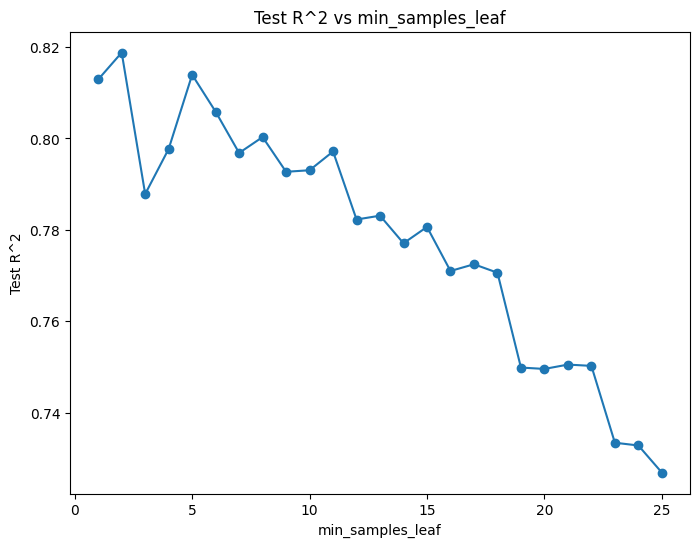

Optimal min_samples_leaf: 2 with Test R^2: 0.8187893938096878


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

r2_scores = []
min_samples_leaf_range = range(1, 26)
for m in min_samples_leaf_range:
    dt_reg = DecisionTreeRegressor(min_samples_leaf = m, random_state = 42)
    dt_reg.fit(X_train, y_train)
    r2 = dt_reg.score(X_test, y_test)
    r2_scores.append(r2)
    print("min_samples_leaf = ", m, "R2 score:", r2)

# Plotting the R2 scores vs min_samples_leaf
plt.figure(figsize = (8, 6))
plt.plot(min_samples_leaf_range, r2_scores, marker = 'o')
plt.xlabel('min_samples_leaf')
plt.ylabel('Test R^2')
plt.title('Test R^2 vs min_samples_leaf')
plt.show()

# Find the best min_samples_leaf value
best_choice = np.argmax(r2_scores)
best_min_samples_leaf = min_samples_leaf_range[best_choice]
print("Optimal min_samples_leaf:", best_min_samples_leaf, "with Test R^2:", r2_scores[best_choice])

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?
   - Yes, the density of the residuals is pretty symmetric and centered around 0.

Test RMSE: 144166.70186484567
Test R^2: 0.8187893938096878


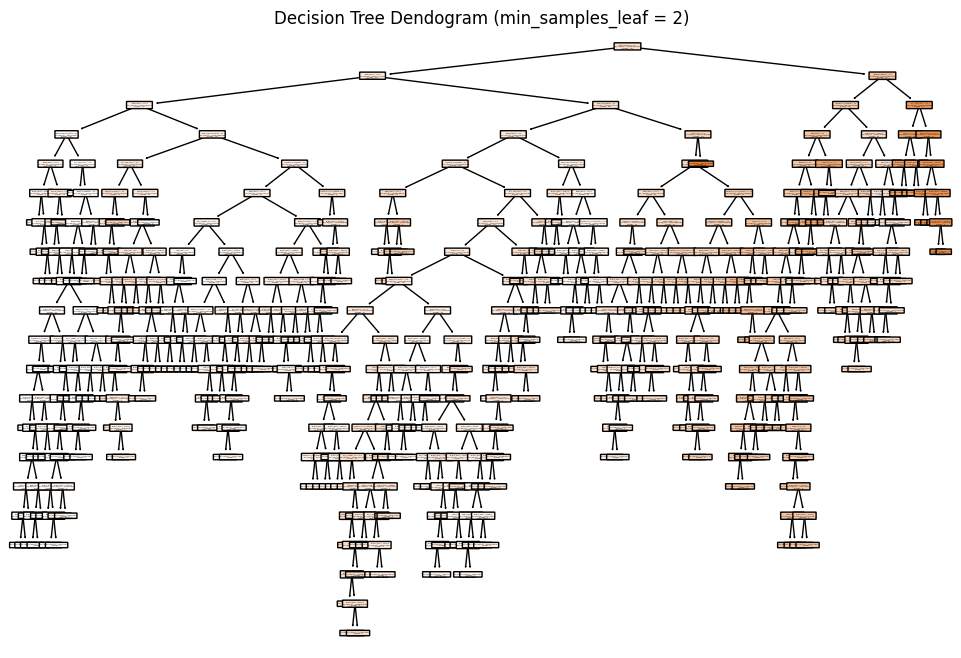

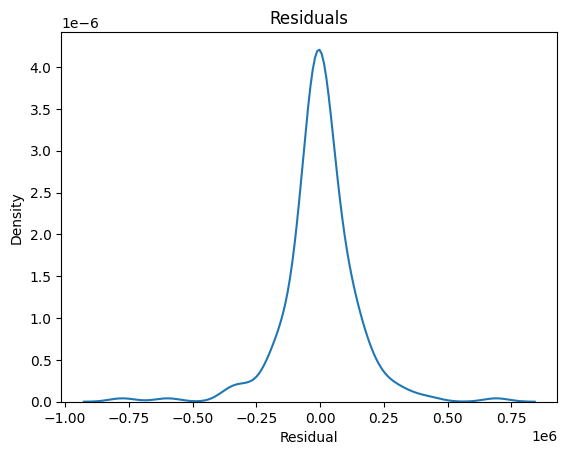

In [53]:
optimal_leaf = 2
dt_reg = DecisionTreeRegressor(min_samples_leaf = optimal_leaf, random_state = 42)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

rmse_test = np.sqrt(np.mean((y_test - y_pred) ** 2))
r2_test = dt_reg.score(X_test, y_test)
print("Test RMSE:", rmse_test)
print("Test R^2:", r2_test)

# Plot the dendogram
plt.figure(figsize = (12, 8))
var_names = dt_reg.feature_names_in_
plot_tree(dt_reg, filled = True, feature_names = var_names, rounded = True)
plt.title("Decision Tree Dendogram (min_samples_leaf = 2)")
plt.show()

# Compute residuals
residuals = y_test - y_pred

# Plot the residuals
sns.kdeplot(residuals)
plt.title("Residuals")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.show()

5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

    - Both models perform similarly, but the linear regression model may be slightly better.
    - Its test RMSE is about 143,575 and its $R^2$ is about 0.8203, while the regression tree's test RMSE is about 144,167 and its $R^2$ is about 0.8188.
    - The linear regression model has a lower RMSE by about 600 and a slightly higher $R^2$, meaning it explains a bit more of the variance in price.
    - The nearly identical results mean that the relationship between the predictors and price is predominantly linear and the regression tree doesn't provide a significant advantage over the linear regression model.

In [54]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

rmse_lr = np.sqrt(np.mean((y_test - y_pred_lr) ** 2))
r2_lr = lin_reg.score(X_test, y_test)

print("Linear Regression Test RMSE:", rmse_lr)
print("Linear Regression Test R^2:", r2_lr)

Linear Regression Test RMSE: 143575.19660661885
Linear Regression Test R^2: 0.8202733305970966


6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

    - The scatter plot shows an overall positive relationship, meaning when the tree predicts higher price, the linear model also tends to predict a higher price.
    - In the upper right area of the plot, the tree occasionally predicts very high prices, while the linear regression predictions remain more moderate.
    - The linear models predictions are closer togehter (never goes as high or low as the tree). This makes sense with the results I compared above showing it generalizes better.

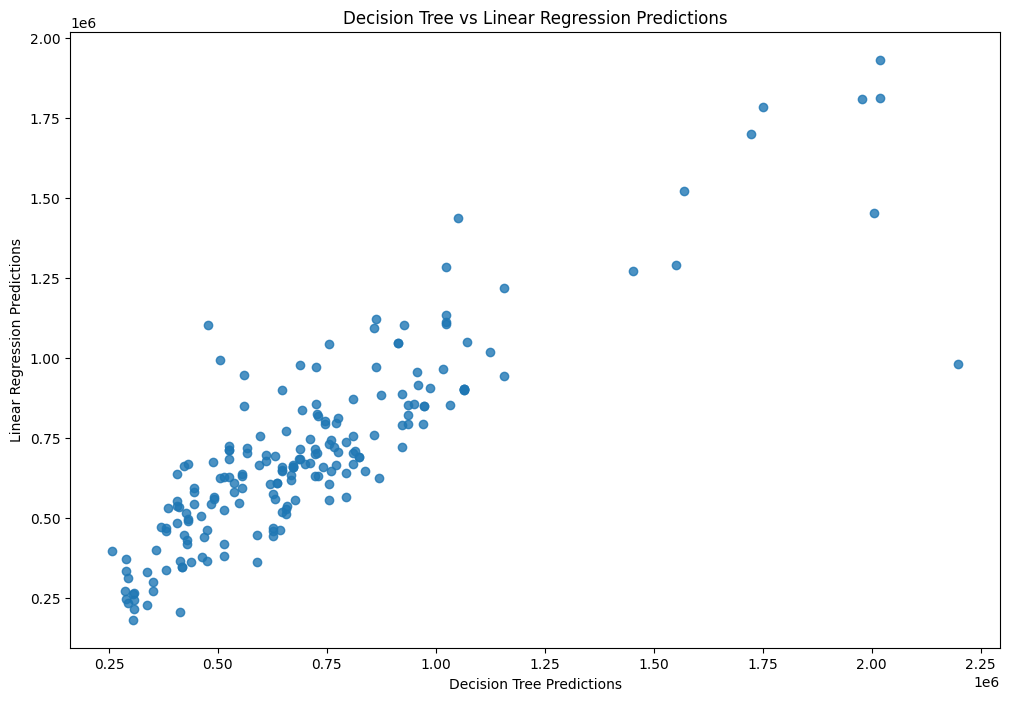

In [55]:
y_pred_tree = dt_reg.predict(X_test)
y_pred_lr = lin_reg.predict(X_test)

plt.figure(figsize = (12, 8))
plt.scatter(y_pred_tree, y_pred_lr, alpha = 0.8)
plt.xlabel("Decision Tree Predictions")
plt.ylabel("Linear Regression Predictions")
plt.title("Decision Tree vs Linear Regression Predictions")
plt.show()

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

In [60]:
df = pd.read_csv('./data/Breast Cancer METABRIC.csv')
print("Shape of the dataset:", df.shape)
print("Variables/columns in the dataset:", df.columns.tolist())
df.head()

Shape of the dataset: (2509, 34)
Variables/columns in the dataset: ['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

In [61]:
X_numeric = df[['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']]
X_categorical = df[['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']]
X_cat_dummies = pd.get_dummies(X_categorical, dtype='int')
X = pd.concat([X_numeric, X_cat_dummies], axis=1)

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

Predicted  Deceased  Living
Actual                     
Deceased        162      71
Living           83      81
Accuracy: 0.6120906801007556


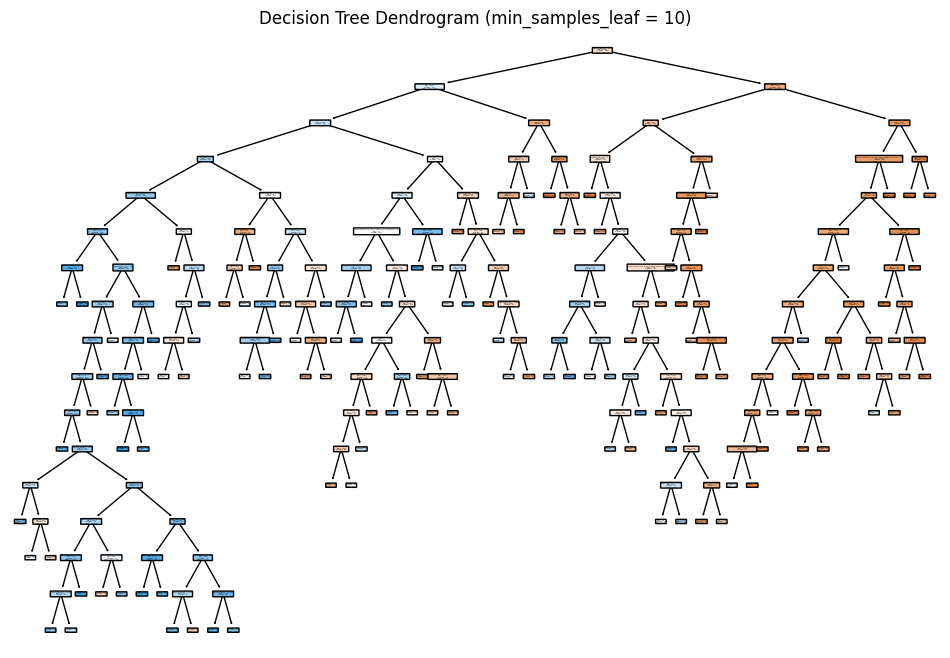

In [62]:
# Drop rows with missing values in the target variable
df_clean = df.dropna(subset = ['Overall Survival Status'])

# Target variable
y = df_clean['Overall Survival Status']

X_clean = X.loc[df_clean.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size = 0.2, random_state = 42)
cart = DecisionTreeClassifier(min_samples_leaf = 10, random_state = 42)
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)

# Confusion matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
print(conf_matrix)

# Accuracy from confusion matrix
accuracy = (conf_matrix.iloc[0, 0] + conf_matrix.iloc[1, 1]) / len(y_test)
print("Accuracy:", accuracy)

# Plot the dendrogram
plt.figure(figsize = (12, 8))
var_names = cart.feature_names_in_
plot_tree(cart, filled = True, feature_names = var_names, rounded = True)
plt.title("Decision Tree Dendrogram (min_samples_leaf = 10)")
plt.show()

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?
      - Yes, the model performs better with respect to sensitivity. It correctly identifies about 69.5% of the positive cases, while its specificity is only about 49.4%, meaning it correctly identifies less than half of the negative cases. So the model is better at identifying positive cases than negative ones.

In [63]:
# Get values from the confusion matrix
TP = conf_matrix.loc['Deceased', 'Deceased']
FN = conf_matrix.loc['Deceased', 'Living']
TN = conf_matrix.loc['Living', 'Living']
FP = conf_matrix.loc['Living', 'Deceased']

# Compute TPR and TNR
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("True Positive Rate (Sensitivity):", TPR)
print("True Negative Rate (Specificity):", TNR)

True Positive Rate (Sensitivity): 0.6952789699570815
True Negative Rate (Specificity): 0.49390243902439024


5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

    - The highest $R^2$ I got is only about 0.08, meaning the model only explains 8% of the variation in the overall survival time. That is really low for clinical purposes, where accurate predictions are really important. The scatter plot shows a broad scatter, indicating a weak relationship between the actual and predicted values. I don't think this would be reliable enough for clinical purposes.

Optimal min_samples_leaf: 142 with Test R^2: 0.0834918688670282


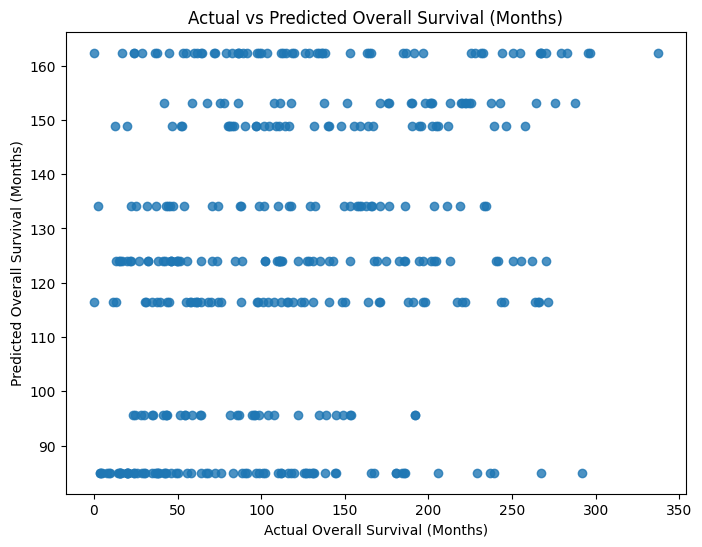

In [72]:
# Drop Nan values in Overall Survival (Months)
df_clean = df.dropna(subset=["Overall Survival (Months)"])

y_clean = df_clean["Overall Survival (Months)"]
X_clean = X.loc[df_clean.index]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size = 0.20, random_state = 42)

# To find optimal min_samples_leaf
r2_scores = []
leaf_range = range(1, 201)
for m in leaf_range:
    dt_reg = DecisionTreeRegressor(min_samples_leaf = m, random_state = 42)
    dt_reg.fit(X_train, y_train)
    r2 = dt_reg.score(X_test, y_test)
    r2_scores.append(r2)

# Identify optimal min_samples_leaf
optimal_index = np.argmax(r2_scores)
optimal_leaf = leaf_range[optimal_index]
best_r2 = r2_scores[optimal_index]
print("Optimal min_samples_leaf:", optimal_leaf, "with Test R^2:", best_r2)

# Fit the model with optimal min_samples_leaf
dt_reg_opt = DecisionTreeRegressor(min_samples_leaf = optimal_leaf, random_state = 42)
dt_reg_opt.fit(X_train, y_train)

# predict on the test set
y_pred_opt = dt_reg_opt.predict(X_test)

# Compute RMSE
rmse_opt = np.sqrt(np.mean((y_test - y_pred_opt) ** 2))

# Plot test values against predicted values
plt.figure(figsize = (8, 6))
plt.scatter(y_test, y_pred_opt, alpha = 0.8)
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title("Actual vs Predicted Overall Survival (Months)")
plt.show()

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?